# Задача 2
Написать программу для решения произвольной линейной системы с положительно определённой матрицей методом Якоби.

16  iterations
q = 0.314252228527
error:  1.0651757254e-10


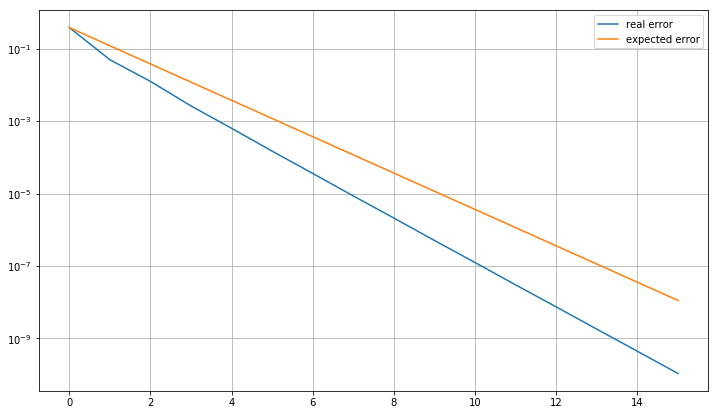

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline 

def generate_pd_matrix(n):
    A = np.random.random(n**2).reshape((n,n))
    U,diag,Vh = linalg.svd(A)
    Vh = U.T
    diag = np.where(diag == 0, diag, np.random.random(len(diag)))
    s = np.zeros(n*n, dtype=np.float32).reshape(n,n)
    np.fill_diagonal(s, diag)
    A = np.matmul(np.matmul(U,s),Vh)
    E = np.zeros(n**2).reshape((n,n))
    np.fill_diagonal(E, np.sum(np.abs(A),axis=1))
    A = A + E
    return A

def solve_jacobi(A, b, x_0, eps, max_iter=5000):
    x = x_0
    n = A.shape[0]
    diag = np.diag(A)
    diag_inv = 1.0 / diag
    D = np.zeros(n**2).reshape((n,n))
    D_inv = np.zeros(n**2).reshape((n,n))
    np.fill_diagonal(D, diag)
    np.fill_diagonal(D_inv, diag_inv)
    LP = A - D
    B = - np.matmul(D_inv,LP)
    norm = np.sum(B**2)**0.5
    assert norm < 1
    trace = [x]
    cnt = 0
    while True:
        x_next = np.matmul(B, x) + np.matmul(D_inv, b)
        trace.append(x_next)
        
        cnt += 1
        
        if cnt % 100 == 0:
            print(cnt, np.max(np.abs(x_next - x)))

        if cnt == max_iter:
            break
            
        if np.max(np.abs(x_next - x)) < eps * (1.0 - norm):
            break
        x = x_next
    return x_next, np.array(trace), norm

def run(n=5, eps=1e-9, plot=False):
    A,b = generate_pd_matrix(n), np.random.random(n)
    x_accurate = np.linalg.solve(A,b)
    eig_vals = np.linalg.eigvals(A)
    x_0 = np.random.random(n)
    x_jacobi, trace, norm = solve_jacobi(A,b,x_0,eps)
    print(len(trace), ' iterations')
    error = np.max(np.abs(x_jacobi - x_accurate))
    error_trace = np.max(np.abs(x_accurate - trace), axis=1)
    theor_error = np.max(np.abs(x_accurate - x_0)) * np.power(norm, np.arange(len(trace)))
    print('q =', norm)
    if plot:
        plt.figure(figsize=(12,7))
        plt.grid(True)
        plt.semilogy(range(len(trace)), error_trace, label='real error')
        plt.semilogy(range(len(trace)), theor_error, label='expected error')
        plt.legend(loc='best')
    print('error: ', error)
    
run(plot=True)

16  iterations
q = 0.321061957714
error:  6.21347695517e-11
19  iterations
q = 0.436468844959
error:  4.62887506103e-11
18  iterations
q = 0.360096295164
error:  3.79634379488e-11
18  iterations
q = 0.387792955253
error:  7.2575001564e-11
16  iterations
q = 0.397749410431
error:  7.57139906327e-11


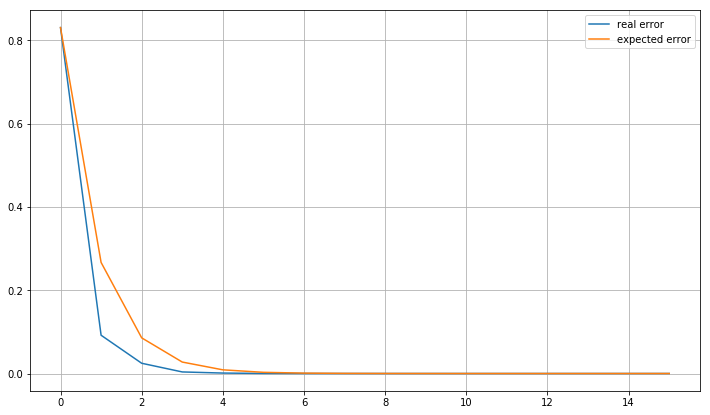

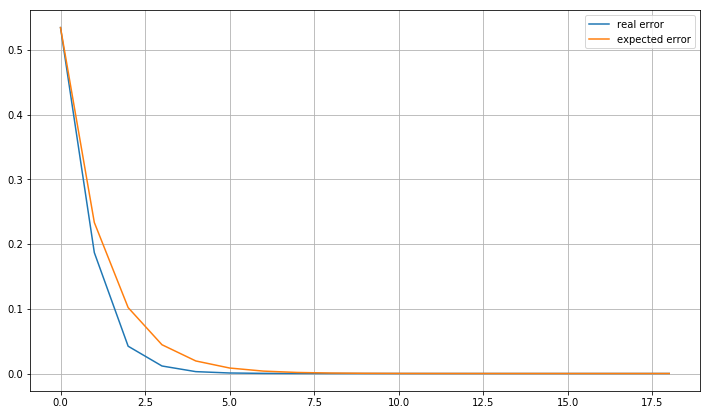

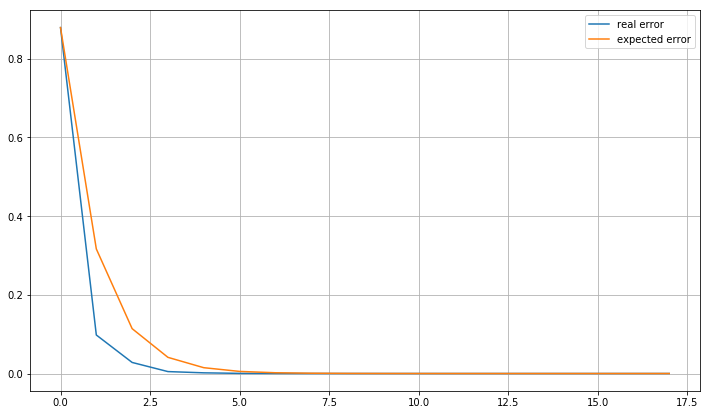

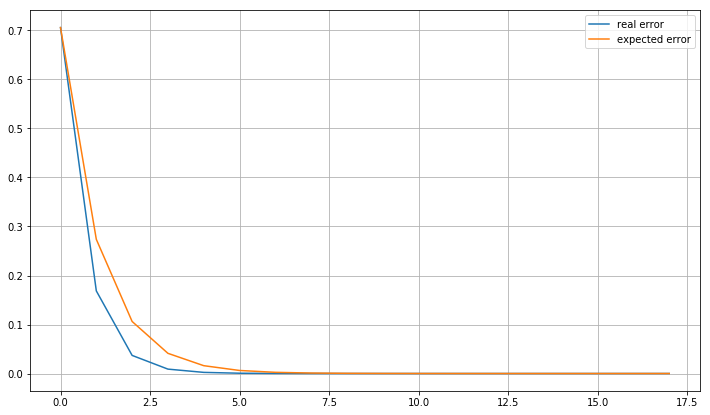

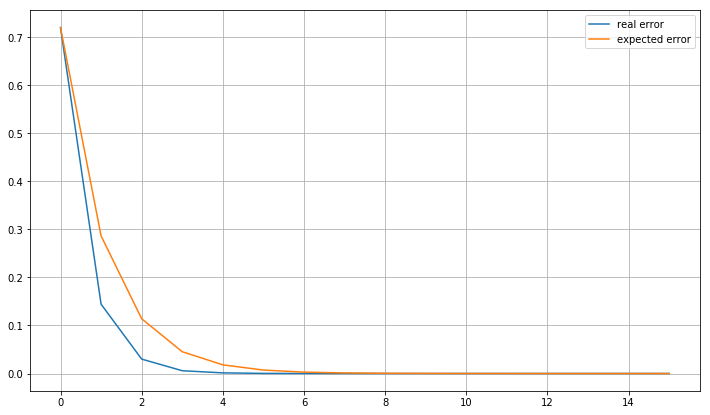

In [127]:
for _ in range(5):
    run(plot=True)